In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [2]:
# Sampling 20,000 data entries
n = 767672 
s = 40000
skip = sorted(random.sample(range(1,n+1),n-s))
data = pd.read_csv('zeroopenpowerlifting.csv', skiprows=skip)
data

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.80,60,80.0,...,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27
1,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.80,75,180.0,...,475.0,1,452.31,452.31,397.92,762.42,NaN,NaN,GPC-AUS,2018-10-27
2,Anthony Provenza,M,SBD,Wraps,34.0,24-34,M-OR,114.70,125,0.0,...,720.0,4,418.65,418.65,400.35,599.24,NaN,NaN,GPC-AUS,2018-10-27
3,James Beischer,M,SBD,Wraps,25.0,24-34,M-OR,108.10,110,165.0,...,525.0,6,310.66,310.66,297.79,429.40,NaN,NaN,GPC-AUS,2018-10-27
4,Kane Latham,M,SBD,Wraps,33.0,24-34,M-OR,107.40,110,190.0,...,612.5,3,363.20,363.20,348.24,517.11,NaN,Australia,GPC-AUS,2018-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Mason Bannavong,M,SBD,Wraps,28.0,24-34,int,82.19,82.5,0.0,...,622.5,1,417.96,417.96,402.23,626.25,Yes,USA,NASA,2019-06-22
39996,Joey Gazzo,M,SBD,Wraps,59.0,55-59,m2,112.13,125,0.0,...,580.0,1,339.38,446.29,324.57,472.64,Yes,USA,NASA,2019-06-22
39997,Sandra Guzman,F,BD,Raw,60.0,60-64,wm3,69.58,75,0.0,...,131.0,1,130.87,175.36,115.37,NaN,Yes,USA,NASA,2020-02-22
39998,Nick Dwinell,M,B,Raw,64.0,60-64,bpm3,97.30,100,0.0,...,125.0,1,76.94,111.56,73.53,457.19,Yes,USA,NASA,2020-02-22


In [3]:
# Dropping columns not needed for this test
data = data.drop(columns=['Name', 'AgeClass', 'Division',
                          'Squat4Kg', 'Bench4Kg', 'Deadlift4Kg',
                          'Place', 'Tested', 'Country', 'Federation',
                          'Date', 'IPFPoints', 'TotalKg', 'Squat1Kg',
                          'Squat2Kg', 'Squat3Kg','Bench1Kg', 'Bench2Kg',
                          'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
                          'Deadlift3Kg', 'McCulloch', 'Wilks',
                          'WeightClassKg'])

data.columns
data.isnull().sum()

Sex                   0
Event                 0
Equipment             0
Age                   0
BodyweightKg          0
Best3SquatKg          0
Best3BenchKg          0
Best3DeadliftKg       0
Glossbrenner       2356
dtype: int64

In [4]:
# General dropna just  to clear those without a WILKS
data = data.dropna()

In [5]:
# Dropping athletes who did not compete in complete SBD competitions
indexNames = data[data['Event'] == 'S'].index
data.drop(indexNames, inplace=True)

indexNames = data[data['Event'] == 'B'].index
data.drop(indexNames, inplace=True)

indexNames = data[data['Event'] == 'D'].index
data.drop(indexNames, inplace=True)

indexNames = data[data['Event'] == 'SD'].index
data.drop(indexNames, inplace=True)

indexNames = data[data['Event'] == 'SB'].index
data.drop(indexNames, inplace=True)

indexNames = data[data['Event'] == 'BD'].index
data.drop(indexNames, inplace=True)
data

,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Glossbrenner
0,F,SBD,Wraps,29.0,59.80,105.0,55.0,130.0,286.42
1,F,SBD,Wraps,37.0,74.80,200.0,95.0,180.0,397.92
2,M,SBD,Wraps,34.0,114.70,270.0,180.0,270.0,400.35
3,M,SBD,Wraps,25.0,108.10,185.0,120.0,220.0,297.79
4,M,SBD,Wraps,33.0,107.40,212.5,135.0,265.0,348.24
...,...,...,...,...,...,...,...,...,...
39989,M,SBD,Multi-ply,20.0,71.76,170.0,100.0,165.0,309.73
39991,F,SBD,Raw,69.0,87.18,77.5,42.5,127.5,189.01
39992,F,SBD,Wraps,20.5,71.76,157.5,80.0,175.0,355.47
39995,M,SBD,Wraps,28.0,82.19,220.0,127.5,275.0,402.23


In [6]:
# Convert string data to numeric
sex = {'M': 1, 'F': 0, 'Mx': 3}
equipment = {'Raw': 0, 'Wraps': 1, 'Multi-ply': 2, 'Single-ply': 3, 'Straps': 4}

data.Sex = [sex[item] for item in data.Sex]
data.Equipment = [equipment[item] for item in data.Equipment]

In [7]:
# Normalise the data, scaling to values between 0-1
scaler = MinMaxScaler(feature_range=(0,1))
data[['Sex', 'Age', 'Equipment', 'BodyweightKg',
        'Glossbrenner', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']] = scaler.fit_transform(data[['Sex', 'Age', 'Equipment', 'BodyweightKg',
        'Glossbrenner', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg']])

In [8]:
# So, running 3 different test and training sets.
# First for squats, then bench, finally deadlifts,
# See the model accuracy for predicting someone's lifts.
# Further experiments to see which variables are critical
# to accurate prediction. How accurate can we get with age,
# sex, weight, and equipment?

test_data = data[[ 'Sex', 'Age','BodyweightKg', 'Equipment', 'Glossbrenner']]

target_squat = data[['Best3SquatKg']]

target_bench = data[['Best3BenchKg']]

target_dead = data[['Best3DeadliftKg']]

In [9]:
#Prepare the sets
X = test_data
s = target_squat
b = target_bench
d = target_dead

In [10]:
# Split sets into training and test sets
X_train, X_test, s_train, s_test = train_test_split(X, s, test_size=0.1, random_state=3)
X_train, X_test, b_train, b_test = train_test_split(X, b, test_size=0.1, random_state=3)
X_train, X_test, d_train, d_test = train_test_split(X, d, test_size=0.1, random_state=3)

In [11]:
# Prepare random forest models, check r2_scores.
srfregr = RandomForestRegressor(n_estimators=10, max_depth = 15, bootstrap=True)
brfregr = RandomForestRegressor(n_estimators=10, max_depth = 15, bootstrap=True)
drfregr = RandomForestRegressor(n_estimators=10, max_depth = 15, bootstrap=True)

In [12]:
srfregr.fit(X_train, s_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
S_rfr = srfregr.predict(X_test)
print("R2-score: %.2f" % r2_score(S_rfr , s_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(s_test, S_rfr)))
print("Std: %.2f" % s_test.std())

S_rfr1 = srfregr.predict(X_train)
print("Train R2-score: %.2f" % r2_score(S_rfr1 , s_train))
print("Train RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(s_train, S_rfr1)))
print("Train Std: %.2f" % s_train.std())

R2-score: 0.95
RMSE: 0.03
Std: 0.14
Train R2-score: 0.99
Train RMSE: 0.02
Train Std: 0.13


In [14]:
brfregr.fit(X_train, b_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
B_rfr = brfregr.predict(X_test)
print("R2-score: %.2f" % r2_score(B_rfr , b_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(b_test, B_rfr)))
print("Std: %.2f" % b_test.std())

R2-score: 0.89
RMSE: 0.04
Std: 0.12


In [16]:
drfregr.fit(X_train, d_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
D_rfr = drfregr.predict(X_test)
print("R2-score: %.2f" % r2_score(D_rfr , d_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(d_test, D_rfr)))
print("Std: %.2f" % d_test.std())

R2-score: 0.92
RMSE: 0.04
Std: 0.14


In [18]:
#Prepare Lineaar models and check r2_scores
S_linreg = LinearRegression()
B_linreg = LinearRegression()
D_linreg = LinearRegression()

In [19]:
S_linreg.fit(X_train, s_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
S_lin = S_linreg.predict(X_test)
print("R2-score: %.2f" % r2_score(S_lin , s_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(s_test, S_lin)))
print("Std: %.2f" % s_test.std())

S_lin1 = S_linreg.predict(X_train)
print("Train R2-score: %.2f" % r2_score(S_lin1, s_train))
print("Train RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(s_train, S_lin1)))
print("Train Std: %.2f" % s_train.std())

R2-score: 0.93
RMSE: 0.04
Std: 0.14
Train R2-score: 0.92
Train RMSE: 0.04
Train Std: 0.13


In [21]:
B_linreg.fit(X_train, b_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
B_lin = B_linreg.predict(X_test)
print("R2-score: %.2f" % r2_score(B_lin , b_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(b_test, B_lin)))
print("Std: %.2f" % b_test.std())

R2-score: 0.87
RMSE: 0.04
Std: 0.12


In [23]:
D_linreg.fit(X_train, d_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
D_lin = D_linreg.predict(X_test)
print("R2-score: %.2f" % r2_score(D_lin , d_test))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(d_test, D_lin)))
print("Std: %.2f" % d_test.std())

R2-score: 0.90
RMSE: 0.04
Std: 0.14


In [25]:
sfr_pred = pd.DataFrame(srfregr.predict(X_test))

slr_pred = pd.DataFrame(S_linreg.predict(X_test))


S_bw = pd.DataFrame(X_test['BodyweightKg'])
S_bw = S_bw.reset_index()
S_bw = S_bw.drop(columns = 'index')

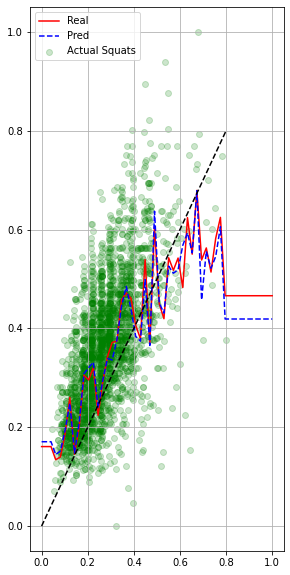

In [26]:
# Visualizing the data points in the random forest
#
xfit = np.linspace(0, 1)
yfit = RandomForestRegressor().fit(S_bw, sfr_pred.values.ravel()).predict(xfit[:, None])
zfit = RandomForestRegressor().fit(S_bw, s_test.values.ravel()).predict(xfit[:, None])
plt.figure(figsize=(10,10))

plt.subplot(1 , 2, 1)
plt.scatter(S_bw, s_test, color = 'green', label='Actual Squats', alpha=0.2)
plt.plot(xfit, np.sin(zfit),'red', label='Real');
plt.plot(xfit, np.sin(yfit),'b--', label='Pred');
plt.plot([0,0.8], [0,0.8], 'k--')
plt.legend()
plt.grid(True)


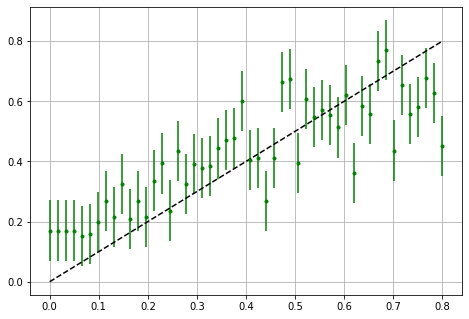

In [27]:
# Visualising the error bars for the random forest
xfit = np.linspace(0, 0.8)
yfit = RandomForestRegressor().fit(S_bw, sfr_pred.values.ravel()).predict(xfit[:, None])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.errorbar(xfit, yfit, 0.1, fmt='.g')
plt.plot([0,0.8], [0,0.8], 'k--')
ax.grid(True)
plt.show()

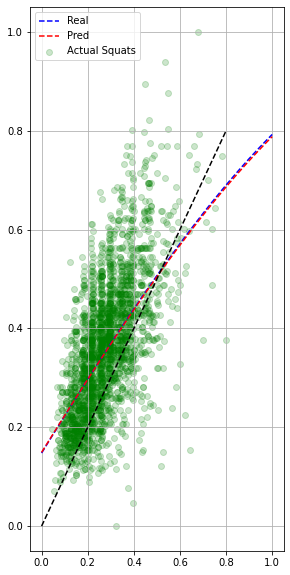

In [28]:
xfit = np.linspace(0, 1)
yfit = LinearRegression().fit(S_bw, slr_pred).predict(xfit[:, None])
zfit = LinearRegression().fit(S_bw, s_test).predict(xfit[:, None])
plt.figure(figsize=(10,10))

plt.subplot(1 , 2, 1)
plt.scatter(S_bw, s_test, color = 'g', label='Actual Squats', alpha=0.2)
plt.plot(xfit, np.sin(zfit), 'b--', label='Real');
plt.plot(xfit, np.sin(yfit), 'r--', label='Pred');
plt.plot([0,0.8], [0,0.8], 'k--')
plt.legend()
plt.grid(True)

plt.show()

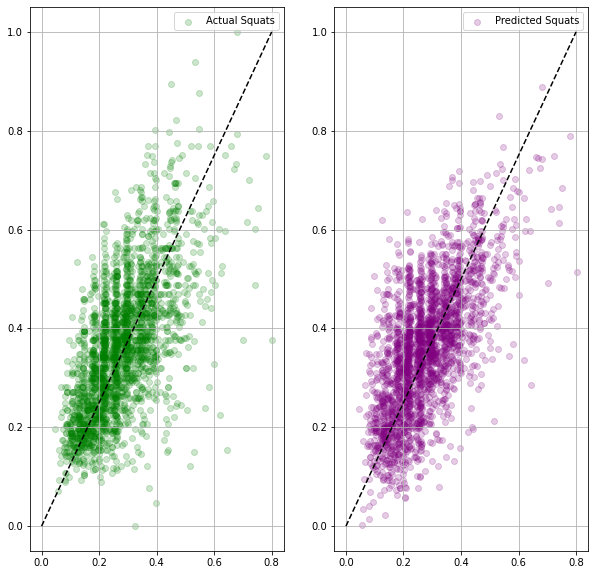

In [29]:
# Visualising the difference between the actual squats, and the 
# predicted squats
xfit = np.linspace(0, 1)
yfit = LinearRegression().fit(S_bw, slr_pred).predict(xfit[:, None])
zfit = LinearRegression().fit(S_bw, s_test).predict(xfit[:, None])
plt.figure(figsize=(10,10))

plt.subplot(1 , 2, 1)
plt.scatter(S_bw, s_test, color = 'g', label='Actual Squats', alpha=0.2)
plt.plot([0,0.8], [0,1], 'k--')
plt.legend()
plt.grid(True)

plt.subplot(1 , 2, 2)
plt.scatter(S_bw, slr_pred, color = 'purple', label='Predicted Squats', alpha=0.2)
plt.plot([0,0.8], [0,1], 'k--')
plt.legend()
plt.grid(True)

ax.grid(True)
plt.show()

In [30]:
training_sizes = [1, 500, 2000, 5000, 7500, 10000, 15000, 19000]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = s, train_sizes = training_sizes,cv = 100,
scoring = 'neg_root_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)*10
validation_scores_mean = -validation_scores.mean(axis = 1)*10
print(train_scores_mean)
print(validation_scores_mean)

[-0.          0.37628686  0.3873927   0.39103846  0.36958462  0.35623604
  0.3542326   0.35536231]
[2.04823536 0.3607487  0.35704602 0.35185951 0.35097649 0.35003956
 0.34971913 0.34980368]


(0.0, 15000.0)

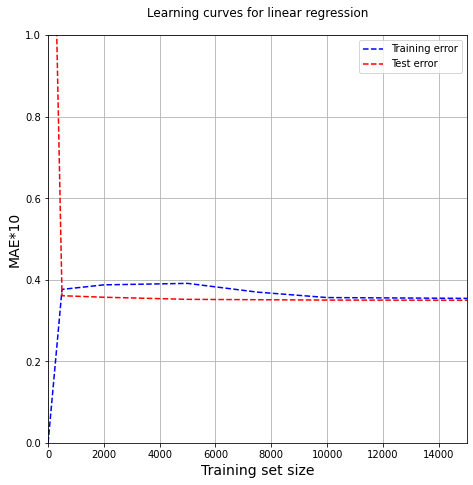

In [31]:
plt.figure(figsize=(7.5,7.5))
plt.plot(train_sizes, train_scores_mean, 'b--', label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, 'r--', label = 'Test error')
plt.ylabel('MAE*10', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for linear regression', fontsize = 12, y = 1.03)
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 15000)